In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.rcParams.update({"font.size": 18, "text.usetex": True, "font.family": "Times New Roman"})

Reading $\kappa, \gamma_{c}, \gamma_{s}$ maps:

In [2]:
gc_2744 = np.load('Gc_a2744A.npy')
gs_2744 = np.load('Gs_a2744A.npy')
k_2744 = np.load('kappa_a2744A.npy')
mu_2744 = 1/((1-k_2744)**2-gc_2744**2-gs_2744**2)

gc_0416 = np.load('Gc_m0416A.npy')
gs_0416 = np.load('Gs_m0416A.npy')
k_0416 = np.load('kappa_m0416A.npy')
mu_0416 = 1/((1-k_0416)**2-gc_0416**2-gs_0416**2)

We saw that using the standard deviation, and rms methods as a measure of dispersion in the magnification is extremely prone to outliers. There are far more robust statistical estimators, such as the *median absolute deviation*. Given a set $\{a_{1}, a_{2}, \ldots, a_{n}\}$, one computes the median absolute deviation using the formula:

$$\text{MAD}(A) = \text{med}\left(|a_{i} - \text{med}(A)|\right)$$.

We know, by construction, that the median is very robust against outliers (these are typically the terms that are cancelled out the first). We can see what using the MAD will do on our statistics.

In [3]:
def doplot(i):
    f,ax = plt.subplots(2,3,figsize=(15,10))

    ax[0][0].hist(k_2744[i],bins=100,density=True,alpha=0.5,label='A2744')
    ax[0][0].hist(k_0416[i],bins=100,density=True,alpha=0.5,label='M0416')
    ax[0][0].set_xlabel(r'$\kappa$')
    ax[0][0].legend()
    ax[0][0].set_title('slice {}'.format(i))

    ax[0][1].hist(gc_2744[i],bins=100,density=True,alpha=0.5)
    ax[0][1].hist(gc_0416[i],bins=100,density=True,alpha=0.5)
    ax[0][1].set_xlabel(r'$\gamma_c$')

    ax[0][2].hist(gs_2744[i],bins=100,density=True,alpha=0.5)
    ax[0][2].hist(gs_0416[i],bins=100,density=True,alpha=0.5)
    ax[0][2].set_xlabel(r'$\gamma_s$')

    ax[1][0].hist(mu_2744[i],bins=100,density=True,alpha=0.5)
    ax[1][0].hist(mu_0416[i],bins=100,density=True,alpha=0.5)
    ax[1][0].set_xlabel(r'$\mu$ full range')

    # cut out the extreme 1% (0.5% low and 0.5% high)
    cut = 0.01
    icut_2744 = int(0.5*cut*len(mu_2744[i]))
    icut_0416 = int(0.5*cut*len(mu_0416[i]))
    indx_2744 = np.argsort(mu_2744[i])
    indx_0416 = np.argsort(mu_0416[i])
    mucut_2744 = mu_2744[i,indx_2744[icut_2744:-icut_2744]]
    mucut_0416 = mu_0416[i,indx_0416[icut_0416:-icut_0416]]
    mu_2744_MAD = stats.median_abs_deviation(mu_2744)
    mu_0416_MAD = stats.median_abs_deviation(mu_0416)

    ax[1][1].hist(mucut_2744,bins=100,density=True,alpha=0.5)
    ax[1][1].hist(mucut_0416,bins=100,density=True,alpha=0.5)
    ax[1][1].set_xlabel(r'$\mu$ cut by {}'.format(cut))

    ax[1][2].axis('off')
    f.show()

C:\Users\abmad\AppData\Local\Temp\ipykernel_20864\1127966949.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


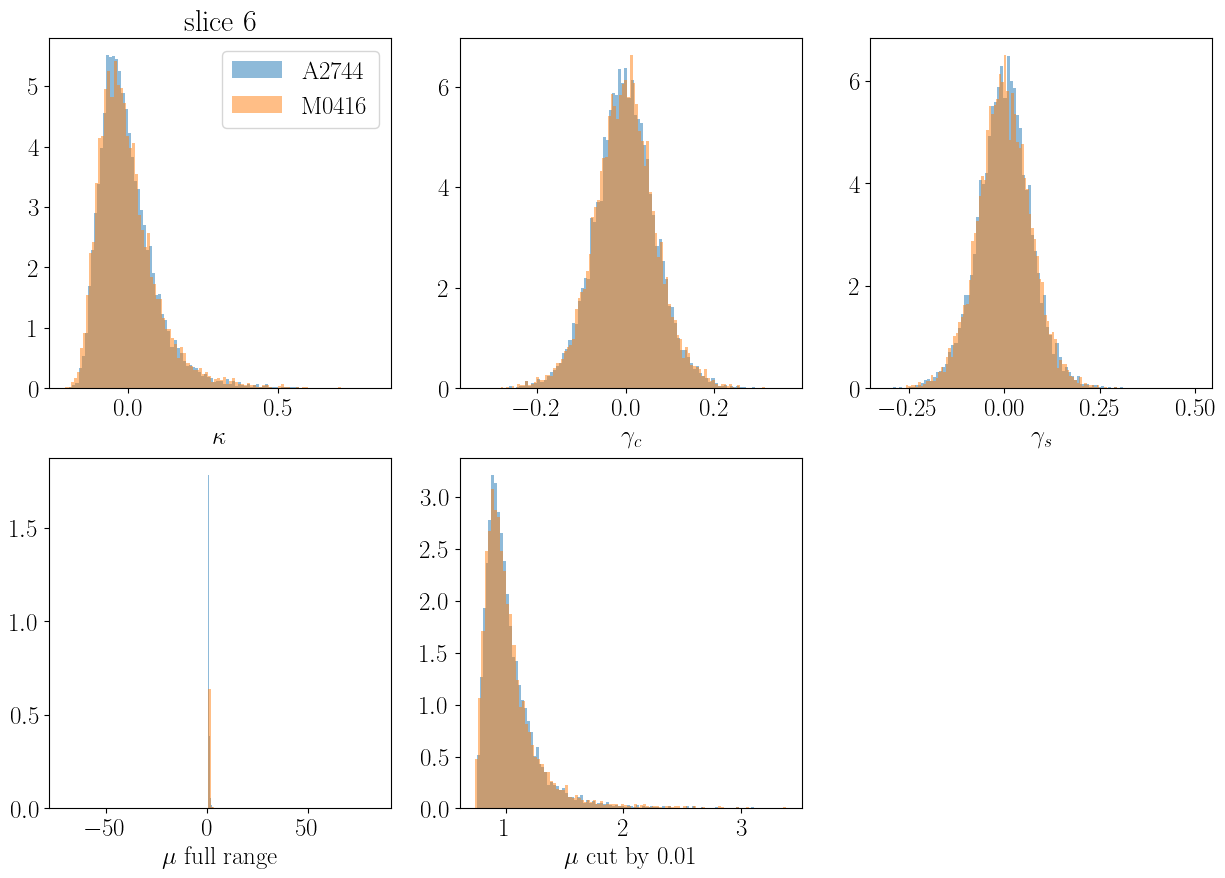

In [4]:
doplot(6)

$2744: MAD(zs = 2) = 9.63% 
 
 M0416: MAD(zs = 2) = 10.11%$


C:\Users\abmad\AppData\Local\Temp\ipykernel_20864\2798501175.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


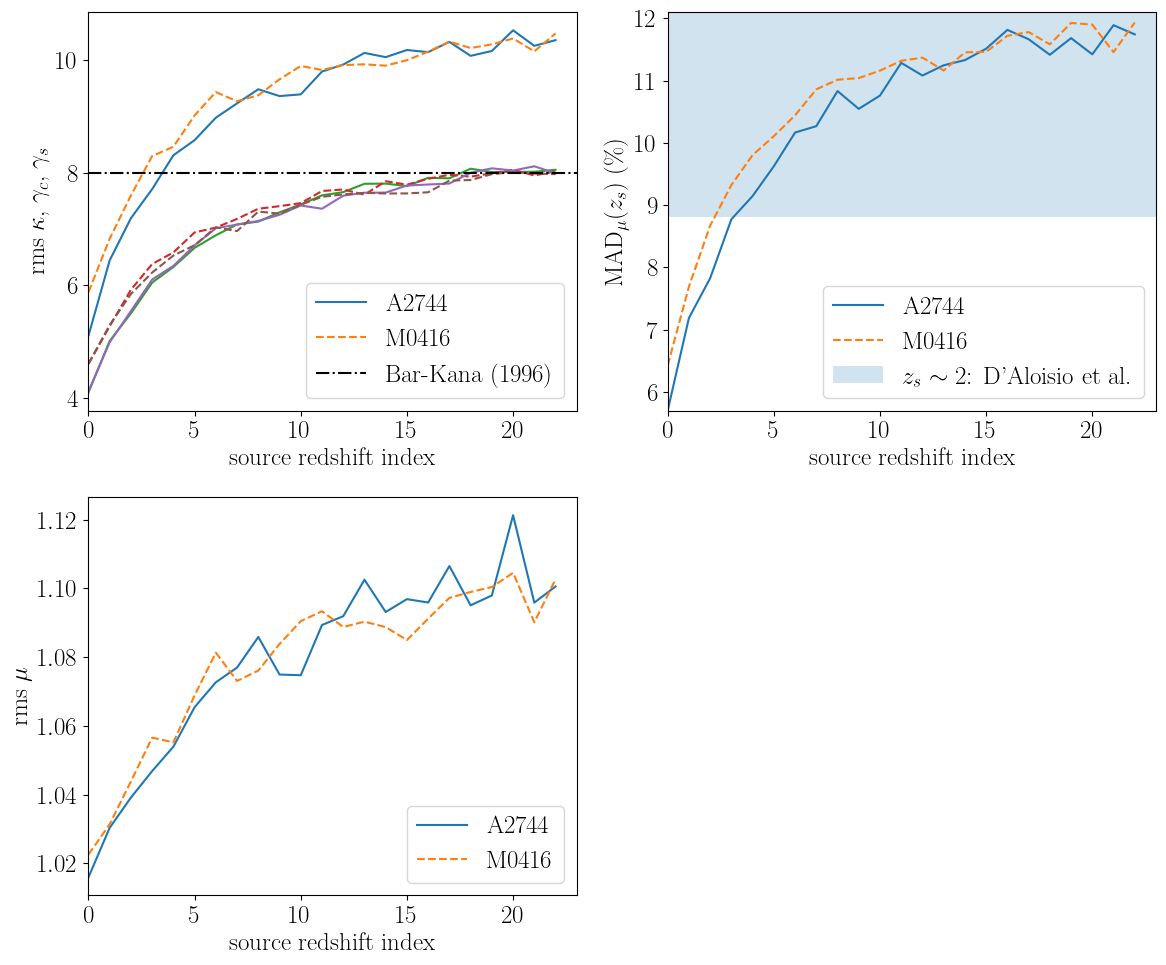

In [28]:
nz = len(mu_2744)
mom_2744 = np.zeros((6,nz)) # rms kappa, rms gamma_c, rms gamma s, rms mu, MAD(mu), std(mu)
mom_0416 = np.zeros((6,nz)) # rms kappa, rms gamma_c, rms gamma s, rms mu, MAD(mu), std(mu)

# fraction of low/high points we remove
cut = 0.01

for i in range(nz):

    icut_2744 = int(0.5*cut*len(mu_2744[i]))
    icut_0416 = int(0.5*cut*len(mu_0416[i]))
    indx_2744 = np.argsort(mu_2744[i])
    indx_0416 = np.argsort(mu_0416[i])
    
    indx = indx_2744[icut_2744:-icut_2744]
    mom_2744[0,i] = np.sqrt(np.mean(k_2744[i,indx]**2))
    mom_2744[1,i] = np.sqrt(np.mean(gc_2744[i,indx]**2))
    mom_2744[2,i] = np.sqrt(np.mean(gs_2744[i,indx]**2))
    mom_2744[3,i] = np.sqrt(np.mean(mu_2744[i,indx]**2))
    mom_2744[4,i] = stats.median_abs_deviation(mu_2744[i])
    mom_2744[5, i] = np.std(mu_2744)
    
    indx = indx_0416[icut_0416:-icut_0416]
    mom_0416[0,i] = np.sqrt(np.mean(k_0416[i,indx]**2))
    mom_0416[1,i] = np.sqrt(np.mean(gc_0416[i,indx]**2))
    mom_0416[2,i] = np.sqrt(np.mean(gs_0416[i,indx]**2))
    mom_0416[3,i] = np.sqrt(np.mean(mu_0416[i,indx]**2))
    mom_0416[4,i] = stats.median_abs_deviation(mu_0416[i])
    mom_0416[5, i] = np.std(mu_0416[i, indx])

f,ax = plt.subplots(2, 2,figsize=(12,10))

ax[0,0].plot(mom_2744[0]*100,linestyle='solid' ,label='A2744')
ax[0,0].plot(mom_0416[0]*100,linestyle='dashed',label='M0416')
ax[0,0].plot(mom_2744[1]*100,linestyle='solid' )
ax[0,0].plot(mom_0416[1]*100,linestyle='dashed')
ax[0,0].plot(mom_2744[2]*100,linestyle='solid' )
ax[0,0].plot(mom_0416[2]*100,linestyle='dashed')
ax[0,0].axhline(8, 0, 1, linestyle ='dashdot', color = 'black', label = 'Bar-Kana (1996)')
ax[0,0].legend(loc='lower right')
ax[0,0].set_xlabel('source redshift index')
ax[0,0].set_ylabel(r'rms $\kappa$, $\gamma_c$, $\gamma_s$')
ax[0,0].set_xlim(0, 23)

ax[1,0].plot(mom_2744[3], linestyle = 'solid', label = 'A2744')
ax[1,0].plot(mom_0416[3], linestyle = 'dashed', label = 'M0416')
ax[1,0].set_xlabel('source redshift index')
ax[1,0].set_ylabel(r'rms $\mu$')
ax[1,0].legend(loc='lower right')
ax[1,0].set_xlim(0,23)

ax[0, 1].plot(mom_2744[4]*100, linestyle = 'solid', label = 'A2744')
ax[0, 1].plot(mom_0416[4]*100, linestyle = 'dashed', label = 'M0416')
ax[0,1].set_xlabel('source redshift index')
ax[0,1].set_ylabel('$\mathrm{{MAD}}_{{\mu}}(z_{{s}})$ (\%)')
ax[0,1].axvspan(xmin = 0, xmax = 23, ymin =(12.1 - 9)/(12.1 - (min([min(mom_2744[4]), min(mom_0416[4])])*100)), ymax =1, alpha=0.2, label = "$z_{{s}} \sim 2$: D'Aloisio et al.")
ax[0,1].set_xlim(0, 23)
ax[0,1].set_ylim(min([min(mom_2744[4]), min(mom_0416[4])])*100, 12.1)
ax[0,1].legend(loc='lower right')
ax[1, 1].axis('off')

print(f'$2744: MAD(zs = 2) = {np.round(mom_2744[4][5]*100,2)}% \n \n M0416: MAD(zs = 2) = {np.round(mom_0416[4][5]*100,2)}%$')

f.tight_layout()
f.show()